In [1]:
from geopandas import GeoDataFrame
import _pickle as cPickle
from shapely.geometry import Polygon, mapping
from shapely.geometry import Point 
import geopandas as gpd
import fiona
import pandas as pd
import geopandas as gpd
import numpy as np
import folium as fo
import shapely as sh
import unicodedata as uco
import pysal as ps
from shapely.geometry import Point
from math import sin,cos,atan,acos,asin,atan2,sqrt,pi, modf
fiona.supported_drivers;
%matplotlib inline

In [2]:
kvartali = gpd.read_file('C:/Users/gery/Desktop/Hackathon/Naselenie_kvartali/Naselenie_kvartali.shp')
kvartali = kvartali.to_crs({'init': 'epsg:4326'})
kvartali['centroid'] = kvartali['geometry'].centroid

In [10]:
tram_stop = gpd.read_file('C:/Users/gery/Desktop/Hackathon/Shp_export/Tram_stops.shp')
tram_stop

,КОД_С,ИМЕ_С,ИМЕ_С_,ЛИНИЯ,БРОЙ,ТИП_С,СЪСТО,ТИП_С_,X,Y,MI_PRINX,geometry
0,None,None,None,None,3,None,None,None,23.305204,42.735750,2,POINT Z (688700.6302434395 4734047.698324526 0)
1,None,None,None,None,2,None,None,None,23.311298,42.679676,10,POINT Z (689369.9619166319 4727834.343034971 0)
2,None,None,None,None,2,None,None,None,23.310427,42.678578,11,POINT Z (689301.9419470344 4727710.458251358 0)
3,None,None,None,None,1,None,None,None,23.274830,42.745950,12,POINT Z (686183.6275013161 4735112.981489228 0)
4,None,None,None,None,1,None,None,None,23.274770,42.746214,13,POINT Z (686177.913131219 4735142.125557038 0)
5,None,None,None,None,3,None,None,None,23.301059,42.737026,18,POINT Z (688357.4546955298 4734180.131368164 0)
6,None,None,None,None,3,None,None,None,23.301651,42.736780,19,POINT Z (688406.6741401324 4734154.176651171 0)
7,None,None,None,None,2,None,None,None,23.406879,42.665525,26,POINT Z (697246.2769463223 4726481.63837408 0)
8,None,None,None,None,2,None,None,None,23.406443,42.665692,27,POINT Z (697210.0364606415 4726499.19480052 0)
9,None,None,None,None,1,None,None,None,23.414728,42.662595,35,POINT Z (697898.9107848154 4726174.560878813 0)


In [3]:
subway_stops = gpd.read_file('E:/Hackathon/Subway/Subway_stops/Subway_stops.shp')
subway_stops = subway_stops.to_crs({'init': 'epsg:4326'})


In [4]:
earthradius = 6371.0

def to_rad(x):
    return x*pi/180

def getDistanceByHaversine(point1, point2):
    "Haversine formula - give coordinates as (lat_decimal,lon_decimal) tuples"

    lat1, lon1 = point1.x,  point1.y
    lat2, lon2 = point2.x, point2.y
    # convert to radians
    lon1 = lon1 * pi / 180.0
    lon2 = lon2 * pi / 180.0
    lat1 = lat1 * pi / 180.0
    lat2 = lat2 * pi / 180.0

    # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = (sin(dlat/2))**2 + cos(lat1) * cos(lat2) * (sin(dlon/2.0))**2
    c = 2.0 * atan2(sqrt(a), sqrt(1.0-a))
    km = earthradius * c
    return km

In [5]:
def get_distance(point1, point2):
    return ((point1.x - point2.x)**2 + (point1.x - point2.x)**2)**.5

def nearest_subway_stop_distance(centroid):
    subway_distances = [getDistanceByHaversine(centroid, subway_stop) for subway_stop in subway_stops.geometry]
    return  min(subway_distances)

def nearest_subway_stop_name(centroid):
    return 3


kvartali['subway_distance'] = kvartali.centroid.apply(nearest_subway_stop_distance)
kvartali['log_subway_distance'] = kvartali.subway_distance.apply(np.log)
kvartali['walking_time_to_subway_station']= kvartali['subway_distance']/4


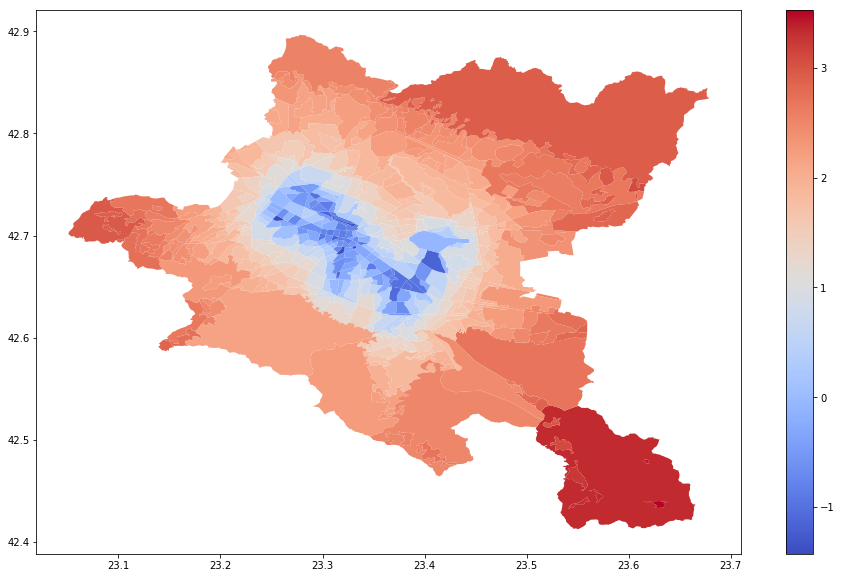

In [6]:
subway_distance_plot = kvartali.plot(column= 'log_subway_distance', cmap='coolwarm', legend=True,figsize=(16, 10));


In [15]:
kvartali[kvartali.RegName.str.contains('Витоша')]

,RegName,Rajon,NSettlemen,Broi_Lica,Broi_Jil,Male,Female,Age0_14,Age15_24,Age25_34,...,Educ4,Educ5,Area_m2,X,Y,geometry,centroid,subway_distance,log_subway_distance,walking_time_to_subway_station
100,Планина Витоша - р-н Витоша,Витоша,С.ВЛАДАЯ,20,18,10,10,6,0,4,...,0,0,7.685533e+07,684902.694225,4.719647e+06,"POLYGON ((23.21997524252973 42.64625962360164,...",POINT (23.25414848618221 42.60708983072102),8.684585,2.161550,2.171146
107,кв. Витоша - Лозенец,Лозенец,ГР.СОФИЯ,4132,4164,2071,2061,742,495,1149,...,126,337,1.877846e+06,691001.543299,4.724086e+06,"POLYGON ((23.32169115358851 42.64315629963599,...",POINT (23.32993507044937 42.64554419675957),1.997420,0.691856,0.499355
108,м. Витоша - ВЕЦ Симеоново,Студентска,ГР.СОФИЯ,2981,2132,1461,1520,516,431,787,...,153,280,4.858359e+05,691623.927940,4.724775e+06,"POLYGON ((23.3375390298562 42.64323135657886, ...",POINT (23.33775347666142 42.65158993326796),2.467176,0.903074,0.616794
481,Планина Витоша - р-н Панчарево,Панчарево,С.ЖЕЛЕЗНИЦА,1,1,0,1,0,0,0,...,0,0,4.295146e+07,691025.800123,4.713493e+06,"POLYGON ((23.34293345935129 42.58649208444547,...",POINT (23.32667335350807 42.55022540702926),9.537406,2.255221,2.384351


In [37]:
kvartali.to_csv("C:/Users/gery/Desktop/Hackathon/kvartali_subway_distance.csv") 


In [19]:
subway_stops.to_csv("C:/Users/gery/Desktop/Hackathon/subway_stops.csv") 
